In [0]:
# Load in dataset
import tensorflow as tf
import numpy as np

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

X_train,X_test = X_train/255.0,X_test/255.0

y_train = y_train.flatten()
y_test  = y_test.flatten() 

In [16]:
K = len(np.unique(y_train))

print('Number of classes : ',K)

Number of classes :  10


In [0]:
#Building the model

from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Model

i = Input(shape=X_train[0].shape)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [0]:
#compile the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4530 - accuracy: 0.5137 - val_loss: 1.2422 - val_accuracy: 0.5582
Epoch 2/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0611 - accuracy: 0.6328 - val_loss: 1.4546 - val_accuracy: 0.5617
Epoch 3/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8514 - accuracy: 0.7036 - val_loss: 1.0956 - val_accuracy: 0.6385
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6818 - accuracy: 0.7639 - val_loss: 1.1258 - val_accuracy: 0.6444
Epoch 5/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5430 - accuracy: 0.8140 - val_loss: 1.2496 - val_accuracy: 0.6353
Epoch 6/15
1563/1563 [==============================] - 37s 24ms/step - loss: 0.4379 - accuracy: 0.8526 - val_loss: 1.6796 - val_accuracy: 0.5704
Epoch 7/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.3800 - accuracy: 0.8749 - val_loss: 1.5454 -

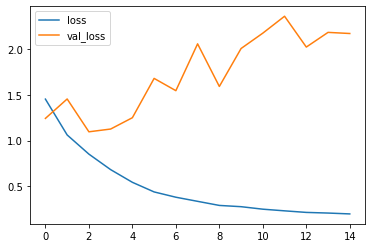

In [20]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

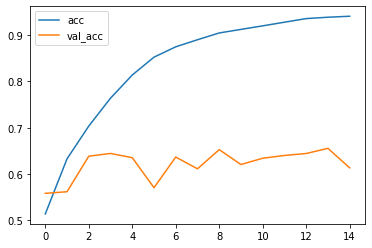

In [21]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()